Name -: Abhinav Bhatt <br>
Matriculation Number -: 7010946 <br>
Email ID -: abbh00001@stud.uni-saarland.de
    
Name -: Deepa Rani Mahato <br>
Matriculation Number -: 7012336 <br>
Email ID -: dema00001@stud.uni-saarland.de

**This notebook contains the runtime code for the Task 3 of the project. The associated imported code is in the src folder.**

In [1]:
# Load the required methods from the src folder which are to be used in this notebook
from src.dataset import read_dataset_hindi, clean_data_and_remove_stopwords, get_splits, read_dataset_bengali
from src.dataset import get_vocab, convert_to_index, TextDataset, get_dataloaders
from src.models import create_embeddings_matrix, BiLSTM, BiLSTM_attention
from src.train import train_and_evaluate, train, evaluate
from src.utils import create_plots
import torch

In [2]:
# Set the device available. We will then pass the device variable in the training loop.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Preprocessing the data and then training the Bidirectional LSTM model on the Hindi Hatespeech Dataset. We initially train on the model without attention and then after that train on the model with attention.

In [3]:
# Read the hindi dataset file.
df = read_dataset_hindi(file_path="data/hindi_hatespeech.tsv")

# Clean the data and remove the stopwords.
df = clean_data_and_remove_stopwords(df, stopwords_file_path="data/stopwords-hi.txt")
df.head()

,text_id,text,task_1,task_2,task_3
0,hasoc_hi_5556,बांग्लादेश शानदार वापसी भारत रन रोका,0,NONE,NONE
1,hasoc_hi_5648,सब रंडी नाच देखने व्यस्त ांतीदूत होगा सब ंडीरो...,1,PRFN,UNT
2,hasoc_hi_164,तुम हरामियों बस जूतों कमी शुक्र तुम्हारी लिंचि...,1,PRFN,TIN
3,hasoc_hi_3530,बीजेपी आकाश विजयवर्गीय जेल रिहा जमानत मिलने खु...,0,NONE,NONE
4,hasoc_hi_5206,चमकी बुखार विधानसभा परिसर आरजेडी प्रदर्शन तेजस...,0,NONE,NONE


In [4]:
# Create the train, test and validation split from the dataset.
df_train_hindi, df_val_hindi, df_test_hindi = get_splits(df)
print("Shape of the splitted dataframes is : ", df_train_hindi.shape, df_val_hindi.shape, df_test_hindi.shape)

Shape of the splitted dataframes is :  (3064, 5) (657, 5) (657, 5)


In [11]:
# Create vocabulary from our training set.
word2idx_hindi, idx2word_hindi = get_vocab(df_train_hindi)

# Create the Data Loaders for the datasets
train_loader_hindi, val_loader_hindi, test_loader_hindi = get_dataloaders(df_train_hindi, df_val_hindi, df_test_hindi, word2idx_hindi, batch_size = 8)

/content/src/dataset.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["text_indices"] = indices_sentences


In [12]:
vocab_size_hindi = len(word2idx_hindi)
embedding_dim = 300
out_dim = 1
hidden_dim = 256

# Create the object for our BiLSTM (Bidirectional LSTM) class.
model = BiLSTM(vocab_size_hindi, embedding_dim, hidden_dim, out_dim).to(device)

In [13]:
# Number of epochs.
num_epochs = 30

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# learning rate scheduler to reduce learning rate after 5 epochs.
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [14]:
# Train and evaluate the model.
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_hindi, val_loader_hindi, test_loader_hindi, optimizer, criterion, device, lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.687 | Train Acc: 54.31%
Val. Loss: 0.679  |  Val. Acc: 62.95%
Test. Loss: 0.684 |  Val. Acc: 58.89%
======================EPOCH 1=========================
Train Loss: 0.672 | Train Acc: 62.30%
Val. Loss: 0.665  |  Val. Acc: 67.32%
Test. Loss: 0.670 |  Val. Acc: 63.86%
======================EPOCH 2=========================
Train Loss: 0.655 | Train Acc: 68.28%
Val. Loss: 0.651  |  Val. Acc: 69.28%
Test. Loss: 0.657 |  Val. Acc: 66.72%
======================EPOCH 3=========================
Train Loss: 0.640 | Train Acc: 70.10%
Val. Loss: 0.636  |  Val. Acc: 69.58%
Test. Loss: 0.643 |  Val. Acc: 68.83%
======================EPOCH 4=========================
Train Loss: 0.623 | Train Acc: 71.38%
Val. Loss: 0.619  |  Val. Acc: 70.33%
Test. Loss: 0.626 |  Val. Acc: 69.13%
======================EPOCH 5=========================
Train Loss: 0.607 | Train Acc: 72.42%
Val. Loss: 0.609  |  Val. Acc: 70.03%
Test. Loss: 0.617 |  Val

In [15]:
# Saving the weights of the model so we can use these later on for transfer Learning.
torch.save(model.state_dict(), "weights_models/weights_bilstm_hindi.pth")

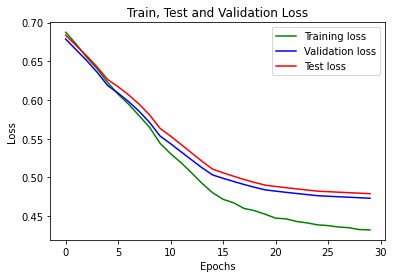

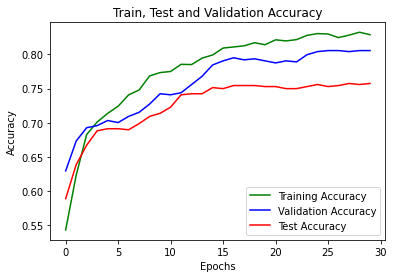

In [16]:
# Create the plots for the train, validation and test set.
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)

## Splitting the Bengali corpus so that it roughly equals Hindi Corpus in size and distribution of classes and applying the preprocessing pipeline from Task 1 to it. 

In [17]:
# Reading the Bengali dataset. This function also makes the size and distribution of classes similar to that of the Hindi dataset. 
df = read_dataset_bengali(file_path="data/bengali_hatespeech.csv")

In [18]:
# Clean the dataset and remove stopwords. Although removing stopwords might not be helpful here because of the dissimilarity between the languages. The preprocessing pipeline is the same as that of task 1.
df = clean_data_and_remove_stopwords(df, stopwords_file_path="data/stopwords-hi.txt")
df.head()

,text,task_1,category
0,ষাঁড় মীর জাফর ইকবাল স্ট্রাইক,1,celebrity
1,ভাই আবার মন্তব্য করলামএই শালা দের জুতা মারো আর...,1,religion
2,জয় একটা জানোয়ার ওর এসব নিয়েই মাতামাতি ও হাশোর ...,1,"Meme, TikTok and others"
3,শালা ভন্ড মাদার,1,religion
4,এই মাগিরে দরো আর সবাই চোদো,1,crime


In [19]:
# Create the train, test and validation split from the dataset.
df_train_bengali, df_val_bengali, df_test_bengali = get_splits(df)

# Create vocabulary from our training set.
word2idx_bengali, idx2word_bengali = get_vocab(df_train_bengali)

# Create the Data Loaders for the datasets
train_loader_bengali, val_loader_bengali, test_loader_bengali = get_dataloaders(df_train_bengali, df_val_bengali, df_test_bengali, word2idx_bengali, batch_size=8)

/content/src/dataset.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["text_indices"] = indices_sentences


## Now, we will train the Bi-LSTM based model on the Bengali dataset.

In [25]:
# vocabulary size for the bengali dataset.
vocab_size_bengali = len(word2idx_bengali)

# Create the object for our BiLSTM (Bidirectional LSTM) class.
model = BiLSTM(vocab_size_bengali, embedding_dim, hidden_dim, out_dim).to(device)

In [26]:
# Number of epochs.
num_epochs = 30

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# learning rate scheduler to reduce learning rate after 5 epochs.
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [27]:
# Train and evaluate the model
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_bengali, val_loader_bengali, test_loader_bengali, optimizer, criterion, device, lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.685 | Train Acc: 55.10%
Val. Loss: 0.680  |  Val. Acc: 59.45%
Test. Loss: 0.677 |  Val. Acc: 60.82%
======================EPOCH 1=========================
Train Loss: 0.669 | Train Acc: 62.79%
Val. Loss: 0.668  |  Val. Acc: 61.74%
Test. Loss: 0.665 |  Val. Acc: 64.63%
======================EPOCH 2=========================
Train Loss: 0.651 | Train Acc: 67.40%
Val. Loss: 0.656  |  Val. Acc: 63.87%
Test. Loss: 0.652 |  Val. Acc: 66.16%
======================EPOCH 3=========================
Train Loss: 0.635 | Train Acc: 70.69%
Val. Loss: 0.644  |  Val. Acc: 64.33%
Test. Loss: 0.640 |  Val. Acc: 67.84%
======================EPOCH 4=========================
Train Loss: 0.617 | Train Acc: 72.13%
Val. Loss: 0.630  |  Val. Acc: 66.01%
Test. Loss: 0.626 |  Val. Acc: 69.97%
======================EPOCH 5=========================
Train Loss: 0.600 | Train Acc: 73.65%
Val. Loss: 0.623  |  Val. Acc: 66.46%
Test. Loss: 0.619 |  Val

In [28]:
# Saving the weights of the model.
torch.save(model.state_dict(), "weights_models/weights_bilstm_Bengali.pth")

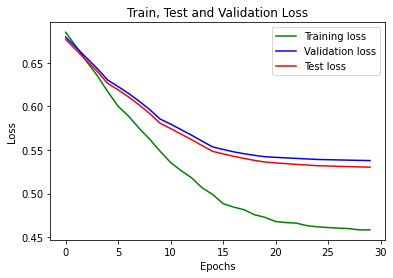

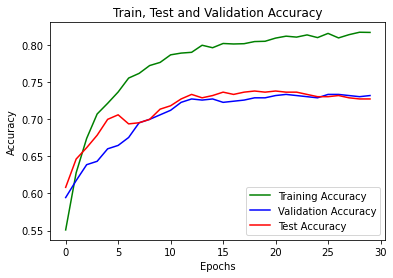

In [29]:
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)

## Now, we will try the transfer learning approach.

**Now, we will try to use transfer learning by initialising our weights to the Hindi classifier weights, and then fine tuning the whole model on the Bengali dataset. We will see whether initiasing our model weights to Hindi classifier weights improves the accuracy.**

In [30]:
# Loading the weights of the previously trained Hindi Classifier
state_dict = torch.load("weights_models/weights_bilstm_hindi.pth")

# Replacing the input Hindi embeddings by the Bengali embeddings trained from the previous Bengali classifier
state_dict["emb.weight"] = model.emb.weight

model = BiLSTM(vocab_size_bengali, embedding_dim, hidden_dim, out_dim).to(device)

# Setting the weights of the classifier to the Hindi classifier
model.load_state_dict(state_dict)
model.to(device)

BiLSTM(
  (emb): Embedding(11137, 300)
  (lstm): LSTM(300, 256, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (out): Linear(in_features=512, out_features=1, bias=True)
)

In [31]:
# Number of epochs.
num_epochs = 30

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# learning rate scheduler to reduce learning rate after 5 epochs.
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [32]:
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_bengali, val_loader_bengali, test_loader_bengali, optimizer, criterion, device, lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.696 | Train Acc: 53.89%
Val. Loss: 0.669  |  Val. Acc: 57.77%
Test. Loss: 0.678 |  Val. Acc: 57.47%
======================EPOCH 1=========================
Train Loss: 0.643 | Train Acc: 63.39%
Val. Loss: 0.635  |  Val. Acc: 65.09%
Test. Loss: 0.643 |  Val. Acc: 63.26%
======================EPOCH 2=========================
Train Loss: 0.595 | Train Acc: 68.76%
Val. Loss: 0.601  |  Val. Acc: 68.45%
Test. Loss: 0.612 |  Val. Acc: 66.62%
======================EPOCH 3=========================
Train Loss: 0.555 | Train Acc: 72.75%
Val. Loss: 0.578  |  Val. Acc: 71.19%
Test. Loss: 0.588 |  Val. Acc: 67.68%
======================EPOCH 4=========================
Train Loss: 0.512 | Train Acc: 77.04%
Val. Loss: 0.566  |  Val. Acc: 71.80%
Test. Loss: 0.585 |  Val. Acc: 68.14%
======================EPOCH 5=========================
Train Loss: 0.482 | Train Acc: 78.29%
Val. Loss: 0.559  |  Val. Acc: 72.56%
Test. Loss: 0.579 |  Val

In [33]:
# Saving the weights of the model.
torch.save(model.state_dict(), "weights_models/weights_bilstm_transfer_learning_Bengali.pth")

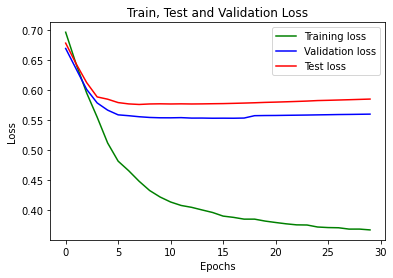

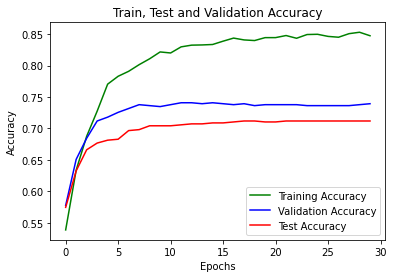

In [34]:
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)

## Now, we will use BiLSTM model with attention layer for the above 3 tasks

## Training the model first on the Hindi dataset

In [54]:
# Creating an object of Bi-LSTM with attention.
model = BiLSTM_attention(vocab_size_hindi, embedding_dim, hidden_dim, out_dim).to(device)

In [55]:
# Number of epochs.
num_epochs = 30

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [56]:
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_hindi, val_loader_hindi, test_loader_hindi, optimizer, criterion, device, lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.691 | Train Acc: 53.30%
Val. Loss: 0.686  |  Val. Acc: 63.70%
Test. Loss: 0.685 |  Val. Acc: 62.50%
======================EPOCH 1=========================
Train Loss: 0.662 | Train Acc: 65.05%
Val. Loss: 0.603  |  Val. Acc: 68.98%
Test. Loss: 0.599 |  Val. Acc: 68.37%
======================EPOCH 2=========================
Train Loss: 0.590 | Train Acc: 66.06%
Val. Loss: 0.558  |  Val. Acc: 73.95%
Test. Loss: 0.553 |  Val. Acc: 73.19%
======================EPOCH 3=========================
Train Loss: 0.552 | Train Acc: 72.42%
Val. Loss: 0.515  |  Val. Acc: 76.96%
Test. Loss: 0.518 |  Val. Acc: 75.00%
======================EPOCH 4=========================
Train Loss: 0.512 | Train Acc: 78.10%
Val. Loss: 0.471  |  Val. Acc: 79.37%
Test. Loss: 0.475 |  Val. Acc: 78.01%
======================EPOCH 5=========================
Train Loss: 0.474 | Train Acc: 80.81%
Val. Loss: 0.453  |  Val. Acc: 79.67%
Test. Loss: 0.457 |  Val

In [57]:
# Saving the weights of the model.
torch.save(model.state_dict(), "weights_models/weights_bilstm_attention_Hindi.pth")

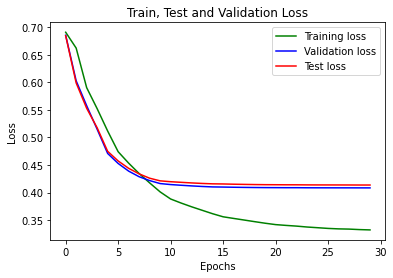

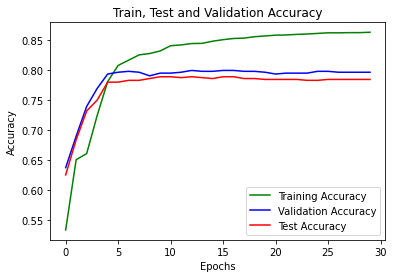

In [58]:
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)

# Now, training the Bi-LSTM with attention model on the Bengali dataset

In [83]:
# Create the object for our BiLSTM with attention class.
model = BiLSTM_attention(vocab_size_bengali, embedding_dim, hidden_dim, out_dim).to(device)

In [84]:
# Number of epochs.
num_epochs = 30

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# learning rate scheduler to reduce learning rate after 5 epochs.
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [85]:
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_bengali, val_loader_bengali, test_loader_bengali, optimizer, criterion, device, lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.693 | Train Acc: 48.08%
Val. Loss: 0.689  |  Val. Acc: 55.95%
Test. Loss: 0.690 |  Val. Acc: 54.88%
======================EPOCH 1=========================
Train Loss: 0.675 | Train Acc: 63.32%
Val. Loss: 0.633  |  Val. Acc: 66.31%
Test. Loss: 0.645 |  Val. Acc: 63.41%
======================EPOCH 2=========================
Train Loss: 0.606 | Train Acc: 66.42%
Val. Loss: 0.579  |  Val. Acc: 66.92%
Test. Loss: 0.595 |  Val. Acc: 65.40%
======================EPOCH 3=========================
Train Loss: 0.564 | Train Acc: 71.14%
Val. Loss: 0.558  |  Val. Acc: 71.95%
Test. Loss: 0.563 |  Val. Acc: 70.43%
======================EPOCH 4=========================
Train Loss: 0.533 | Train Acc: 74.10%
Val. Loss: 0.539  |  Val. Acc: 74.24%
Test. Loss: 0.551 |  Val. Acc: 71.19%
======================EPOCH 5=========================
Train Loss: 0.512 | Train Acc: 76.38%
Val. Loss: 0.534  |  Val. Acc: 74.85%
Test. Loss: 0.544 |  Val

In [86]:
# Saving the weights of the model.
torch.save(model.state_dict(), "weights_models/weights_bilstm_attention_bengali.pth")

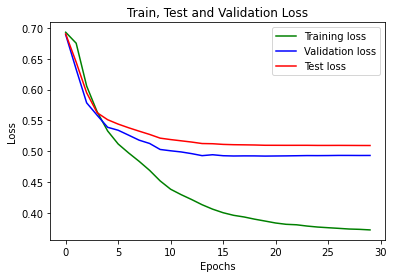

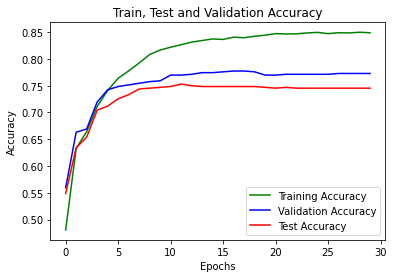

In [87]:
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)

# Now, we will try the transfer learning approach.

**Now, we will try to use transfer learning by initialising our weights to the Hindi classifier weights, and then fine tuning the whole model on the Bengali dataset. We will see whether initiasing our model weights to Hindi classifier weights improves the accuracy.**

In [88]:
# Loading the weights of the previously trained Hindi Classifier
state_dict = torch.load("weights_models/weights_bilstm_attention_Hindi.pth")

# Replacing the input Hindi embeddings by the Bengali embeddings.
state_dict["emb.weight"] = model.emb.weight

model = BiLSTM_attention(vocab_size_bengali, embedding_dim, hidden_dim, out_dim).to(device)

# Setting the weights of the classifier to the Hindi classifier
model.load_state_dict(state_dict)
model.to(device)

BiLSTM_attention(
  (emb): Embedding(11137, 300)
  (lstm): LSTM(300, 256, batch_first=True, bidirectional=True)
  (attention): Attention(
    (weights): Linear(in_features=512, out_features=512, bias=True)
    (context_u): Linear(in_features=512, out_features=1, bias=False)
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (out): Linear(in_features=512, out_features=1, bias=True)
)

In [89]:
# Number of epochs.
num_epochs = 30

# The optimizer variable to use.
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Step based learning rate scheduler which reduces the learning rate after every 5 epochs.
my_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# The loss function to use.
criterion = torch.nn.BCEWithLogitsLoss()

In [90]:
train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc = train_and_evaluate(num_epochs, model, train_loader_bengali, val_loader_bengali, test_loader_bengali, optimizer, criterion, device, my_lr_scheduler)

======================EPOCH 0=========================
Train Loss: 0.681 | Train Acc: 58.06%
Val. Loss: 0.721  |  Val. Acc: 56.71%
Test. Loss: 0.721 |  Val. Acc: 52.90%
======================EPOCH 1=========================
Train Loss: 0.626 | Train Acc: 65.39%
Val. Loss: 0.677  |  Val. Acc: 61.28%
Test. Loss: 0.679 |  Val. Acc: 59.30%
======================EPOCH 2=========================
Train Loss: 0.579 | Train Acc: 70.67%
Val. Loss: 0.653  |  Val. Acc: 64.48%
Test. Loss: 0.655 |  Val. Acc: 63.26%
======================EPOCH 3=========================
Train Loss: 0.536 | Train Acc: 74.10%
Val. Loss: 0.626  |  Val. Acc: 66.92%
Test. Loss: 0.631 |  Val. Acc: 66.01%
======================EPOCH 4=========================
Train Loss: 0.497 | Train Acc: 77.50%
Val. Loss: 0.622  |  Val. Acc: 68.60%
Test. Loss: 0.630 |  Val. Acc: 67.07%
======================EPOCH 5=========================
Train Loss: 0.465 | Train Acc: 79.74%
Val. Loss: 0.619  |  Val. Acc: 69.36%
Test. Loss: 0.627 |  Val

In [91]:
# Saving the weights of the model.
torch.save(model.state_dict(), "weights_models/weights_bilstm_attention_transfer_learning_Bengali.pth")

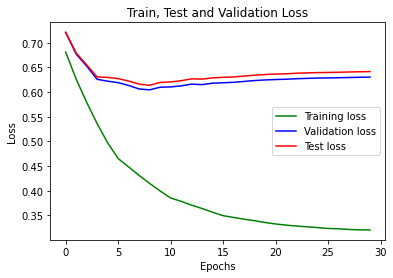

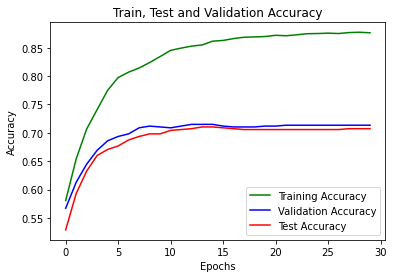

In [92]:
create_plots(train_set_loss, train_set_acc, val_set_loss, val_set_acc, test_set_loss, test_set_acc)